## Lab 1: Quantum Circuits
Generally, the goal of lab is to introduce you to methodologies of codeing a quantum circuits. Here you'll learn about the most commonly used QC library -- Qiskit by IBM. We hope to reinforce your understanding of qunatum states through visualizations, how gates are used to change qubits and thus data, and the kind of information you can extract from these special programs.

In [1]:
import qiskit
import matplotlib

In [2]:
#The QuantumCircuit class has functions for constructing registers and qubits, and enacting gates on them. 
#The assemble class creates a qobj (short for Qunatum Object, duh) which IBM computers interpret on the backend.
#Aer provides functions for qunatum simulations.
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram


Over the course of the labs you will use a number of APIs from Qiskit, but if you wish to explore new ones yourself, here is the link to the documentation: https://qiskit.org/documentation/apidoc/terra.html

## Qiskit Adder
In this lab we will build a simple circuit for adding strings of bits using a simulated quantum computer (for most applications, actual quantum computers are only advantageous once the number of bits, equivalently qubits, exceeds ~30).

### 1.1 Overview

Most quantum circuits can be decomposed into three portions:
1. Encoding - This includes declaring your circuit registers and qubits, and acting gates on them to give your circuit initial conditions.
2. Processing - The main body of code that acts gates on your qubits to derive arrive at the solution.
3. Measuring - Finally we collect values and visualize results to check performance.

One of the best things about Qiskit is its visulization tools. QC problems can quickly become complicated, so its important to visualize your circuit between each step.

Lets practice...

In [3]:
n = 8
#Declare a Quantum Circuit of size n
qc_practice = QuantumCircuit(n)
#Act an X (NOT) gate on the last qubit
qc_practice.x(n-1)
#Visulize the circuit with the .draw() function
qc_practice.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

Notice that n here is the number of qubits declared in our circuit, this is a hyperparameter that we can choose to fit our problem. Like in most programming languages the last qubit takes on index n-1.

Now lets extract our results...

In [4]:
qc_practice.measure_all()
qc_practice.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

The M's (often visualized as dials) on the right of our circuit indicate that we have taken a measurment of each qubit. 

The numbers along the bottom line indicate the index of each measurement. 

The fuzzy line between the X gate and the Measurements is called a barrier. It's used to seperate a quantum circuit into its easily digestible portions: encoding, processing, and measuring.

Lets run the full circuit and vizualize the results

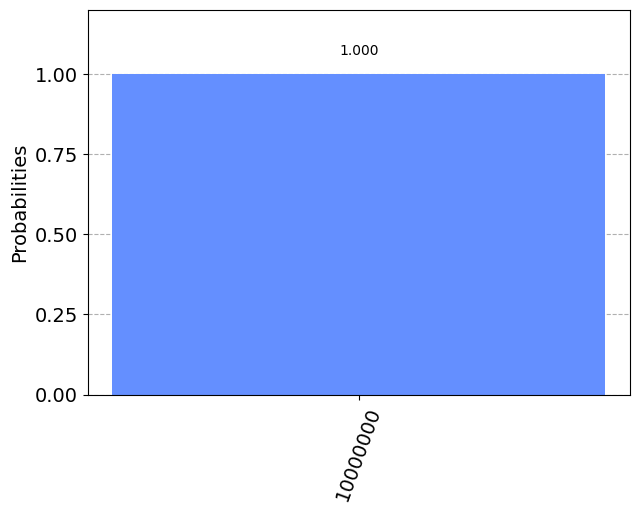

In [5]:
# We begin by declaring a simulator for our circuit to run on
sim = Aer.get_backend('aer_simulator') 
# We run the simulator with sim.run(QUANTUM CIRCUIT),
# And we get the resulting values with .result()
result = sim.run(qc_practice).result()
# We then collect the results using .get_counts()
counts = result.get_counts()
# Visualization
plot_histogram(counts)

This cicuit outputs the binary string `10000000`, which is obviously of no use to us, but notice that the last quibit in our circuit is the first digit of our binary output. This is merely by convention.

Also notice that the `plot_histogram` function displays the probability of our measurement. This is important for problems which handle quantum randomness. This lab does not.

### 1.2 Adding Review

Lets think about how we add bits. 
```
   01
+  10
=  ??
```
Well, `01`= 1, `10`= 2 and 1 + 2 = 3 =`11` in binary. From this we note that adding bits is like adding decimal numbers, we can add them by collumn, right to left.

Now what happens if two single digit decimal numbers sum to greater than 10? We were taught in elemtary school to carry the 1. A similar rule applies here, so lets explore it.
```
   01
+  01
=  ??
```
Obviously, 1 + 1 = 2 = `10`. What about...
```
   11
+  11
=  ??
```
3 + 3 = 6 =`110`=`100`+`10`. So we can in fact carry the values just like in traditional addition, but instead of adding 10^n, where n is the place of the digit we're carrying from, we're adding 2^n.

Let's write down a few rules to sum this up.

1. `0+0 = 00`
2. `0+1 = 01`
3. `1+0 = 01`
4. `1+1 = 10`

Note: In this step we designed rules for the circuit to follow in order to execute an algorithm. This is a quintessential part of QC. Today, QCs operate on fewer than 100 bits, which means we are very limited in the amount of information we can operate on at a given time. This makes it important that our computations are reduced to their fundamental form.

### 1.3 CNOT Gate

From our rules on summing bits, the rightmost bit in the sum is determined by whether or not the bits we are adding are identical or different. Notice how similarity to the XOR gate introduced in lecture. As a reminder, the XOR gate behaves as follows.

| A | B | XOR |
| --- | --- | ---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In quantum computing, this gate is replaced by the controlled-NOT (CNOT) gate. In Quiskit this is called using the Quantum Circuit's `.cx()` function on a pair of bits. The CNOT gate gets its name from the fact that it assigns the 'target' bit `1` iff the target and 'control' bit are identical, and `0` otherwise. For example...

In [6]:
qc = QuantumCircuit(2,2)
# Let the first qubit be 1, such that the two bits are different
qc.x(0)
# Now let the second qubit be our target...
qc.cx(0,1)
# ...we can visualize this...
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

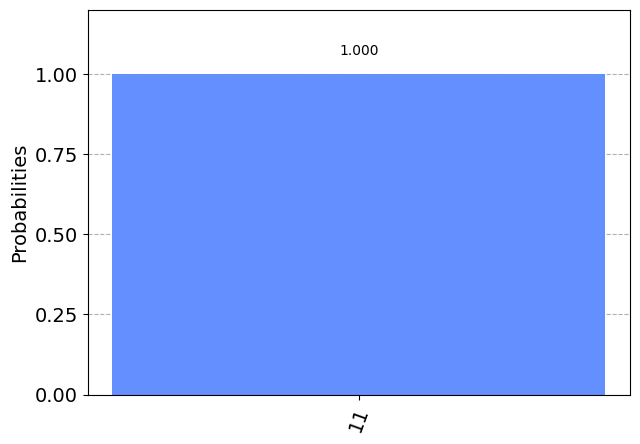

In [7]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
#... and we expect to measure our bits as 11.
plot_histogram(counts)

To recap, the CNOT calculates whether the input values are different and finds that they are, which means that it wants to output `1`. It does this by writing over the state of qubit 1 (which, remember, is on the left of the bit string), turning `01` into `11`. Try this circuit with all 4 combinations of bits. You check that you get the following results.

| Input A | Input B | Output |
| --- | --- | --- |
| 0 | 0 | 00 |
| 0 | 1 | 11 |
| 1 | 0 | 10 |
| 1 | 1 | 01 |

### 1.4 Implementation

Let's make sure our fundamentals are sound by constructing an adder of 2 bits. We'll call this a half-adder. 

Our circuit will look something like this...

![half adder implemented on a quantum circuit](half-adder.svg)

(Image courtesy of IBM's Qiskit Texbook)

For our half adder, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. Now we can use two CNOTs on our existing quibits, and we can write the result to a new quibit. This handles three cases for the right-most digit in our addition problem. 

In [20]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For A=0, remove this line. For A=1, leave it.
qc_ha.x(1) # For B=0, remove this line. For B=1, leave it.
qc_ha.barrier()
# TODO: use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0, 1)
qc_ha.cx(1, 2)

qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░ ┌─┴─┐      ░       
q_1: ┤ X ├─░─┤ X ├──■───░───────
     └───┘ ░ └───┘┌─┴─┐ ░ ┌─┐   
q_2: ──────░──────┤ X ├─░─┤M├───
           ░      └───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

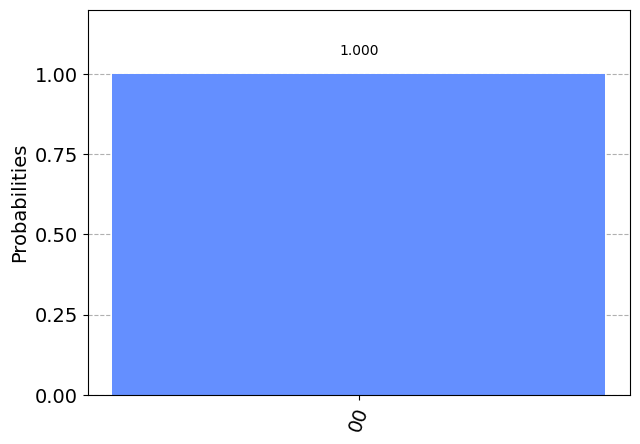

In [21]:
#Test your function for the combinations (A,B)=(0,0), (0,1), (1,0)!
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_ha).result()#TODO: Run the simulation, and collect the results
counts = result.get_counts()#TODO: Get the counts from your results
plot_histogram(counts)
#Hint: Good coders write good code, great coders copy great code.

With this information, we can almost build working half adder. Only the 4th scenario remains to be dealt with: If you look again at the four possible sums, you’ll notice that there is only one case for which this is 1 instead of 0: 1+1=10. It happens only when both the bits we are adding are 1. This bit will live on qubit 3.

To calculate this part of the output, we want to look at whether both of the inputs are 1. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of 1 for this case only, giving us the output we need.

For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state 1. This new gate is called the Toffoli. For those of you who are familiar with Boolean logic gates, it is basically an AND gate.

<img src="Toffoli.png" alt="Toffoli" width="200"/>

In Qiskit, the Toffoli is represented with the `.ccx()` command, which acts on 2 bits. Try this implementation, then try measuring and visualizing your results!

In [22]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For A=0, remove the this line. For A=1, leave it.
qc_ha.x(1) # For B=0, remove the this line. For B=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
### TODO: use ccx to write the AND of the inputs on qubit 3 ###
qc_ha.ccx(0, 1, 3)

qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

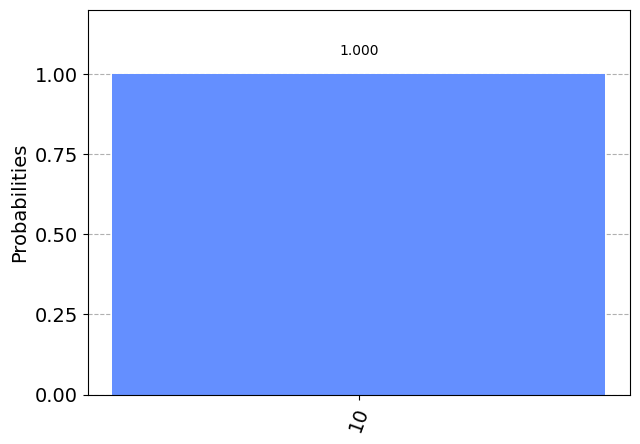

In [23]:
#A short hand for measuring and collecting results is with assemble's qobj!
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

There you have it, you've built your first quantum program!

The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.